---

# **JUALBELI.CO.ID SHOPPERS INTENTIONS**

**Oleh  : Yunido Baheramsyah**


Program ini dibuat untuk memprediksi apakah seorang pengunjung akan melakukan pembelian atau tidak berdasarkan perilaku mereka selama berada di dalam website.

---

# **I. INTRODUCTION**

**Latar Belakang Masalah**

Meskipun jualbeli.co.id telah berhasil menarik trafik yang tinggi ke situs, tingkat konversi pembelian tetap rendah. Hal ini mengindikasikan bahwa tidak semua kunjungan berujung pada transaksi. Oleh karena itu, saya sebagai data scientist jualbeli.co.id diminta untuk melakukan pendekatan berbasis data untuk menganalisa pola perilaku pengunjung yang cenderung melakukan pembelian, agar intervensi yang tepat bisa dilakukan sebelum mereka meninggalkan situs tanpa bertransaksi.

**Objective**

Tujuan dari proyek ini adalah membangun model klasifikasi menggunakan algoritma Supervised Learning (Classification) untuk memprediksi apakah seorang pengunjung akan melakukan pembelian atau tidak berdasarkan perilaku mereka selama berada di situs. Model ini diharapkan dapat membantu tim pemasaran dan pengembangan produk dalam mengidentifikasi profil pengguna potensial yang memiliki kemungkinan tinggi untuk melakukan transaksi, sehingga perusahaan dapat menerapkan strategi yang lebih terarah.

**Problem Statement**

Pembangunan model klasifikasi yang akurat dan terukur diperlukan untuk memprediksi kemungkinan seorang pengunjung situs e-commerce akan melakukan pembelian, berdasarkan data historis perilaku mereka seperti lama kunjungan, interaksi dengan halaman produk, dan jenis pengunjung. Model ini harus mampu memberikan performa optimal berdasarkan metrik seperti F1 Score, sehingga dapat diandalkan untuk mendukung pengambilan keputusan bisnis. Proses pengembangan ditargetkan selesai dalam waktu maksimal satu bulan agar segera dapat digunakan oleh tim pemasaran atau produk untuk meningkatkan tingkat konversi melalui pendekatan yang berbasis data dan prediktif.

# **II. IMPORT LIBRARIES**

In [1]:
# Manipulasi data
import pandas as pd
import numpy as np

# Visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns

import re

# stats library
from scipy import stats
from scipy.stats import zscore
from scipy.stats import skew
from scipy.stats import pearsonr

# Preprocessing dan model building
from feature_engine.outliers import Winsorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Model klasifikasi
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Evaluasi model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV


# Menyimpan model
import pickle

# Mengatur tampilan grafik
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

# **III. DATA LOADING**

In [2]:
# Memuat dataset dari file CSV
df_raw = pd.read_csv('online_shoppers_intention.csv')

# Menampilkan 10 baris pertama untuk melihat struktur awal data
df_raw.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


> Dataset di dapat dari UCI Irvine Machine Learning Repository dengan URL : https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset

In [3]:
# Cek ukuran dataset (jumlah baris dan kolom)
df_raw.shape

(12330, 18)

In [4]:
# Menampilkan informasi tipe data dan jumlah nilai non-null
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

> Dataset terdiri dari 18 kolom dan 12330 baris

In [5]:
# Ubah nama kolom agar lebih mudah digunakan
# Untuk kasus ini pakai metode Camel to Snake (ref: geeksforgeeks.org)
def camel_to_snake(name):
    name = re.sub(r'(.)([A-Z][a-z]+)', r'\1_\2', name)
    name = re.sub(r'([a-z0-9])([A-Z])', r'\1_\2', name)
    return name.lower()

# Ganti nama semua kolom sekaligus
df_raw.columns = [camel_to_snake(col) for col in df_raw.columns]

# Tampilkan nama-nama kolom setelah diubah
df_raw.columns.tolist()

['administrative',
 'administrative__duration',
 'informational',
 'informational__duration',
 'product_related',
 'product_related__duration',
 'bounce_rates',
 'exit_rates',
 'page_values',
 'special_day',
 'month',
 'operating_systems',
 'browser',
 'region',
 'traffic_type',
 'visitor_type',
 'weekend',
 'revenue']

> **Insight:**
Nama-nama kolom telah berhasil diubah menjadi format snake_case seperti `administrative`, `bounce_rates`, dan `revenue`. Ini akan membantu dalam proses pemanggilan kolom di seluruh proyek agar lebih mudah dibaca dan dihindari kesalahan.

In [6]:
# cek kembali info dataset
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   administrative             12330 non-null  int64  
 1   administrative__duration   12330 non-null  float64
 2   informational              12330 non-null  int64  
 3   informational__duration    12330 non-null  float64
 4   product_related            12330 non-null  int64  
 5   product_related__duration  12330 non-null  float64
 6   bounce_rates               12330 non-null  float64
 7   exit_rates                 12330 non-null  float64
 8   page_values                12330 non-null  float64
 9   special_day                12330 non-null  float64
 10  month                      12330 non-null  object 
 11  operating_systems          12330 non-null  int64  
 12  browser                    12330 non-null  int64  
 13  region                     12330 non-null  int

---

# **IV. EXPLORATORY DATA ANALYSIS**

In [7]:
# Menampilkan distribusi target 'revenue'
df_raw['revenue'].value_counts()

revenue
False    10422
True      1908
Name: count, dtype: int64

> **Insight:**
Distribusi target `revenue` menunjukkan jumlah pengunjung yang melakukan pembelian (`True`) dan tidak melakukan pembelian (`False`). Ini penting untuk memahami apakah dataset mengalami ketidakseimbangan kelas yang perlu diatasi.

## **1. Visualisasi Distribusi Target**

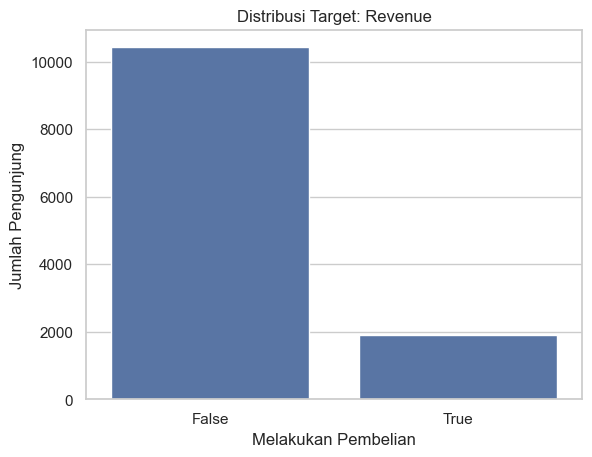

In [8]:
# Visualisasi distribusi target
sns.countplot(x='revenue', data=df_raw)
plt.title('Distribusi Target: Revenue')
plt.xlabel('Melakukan Pembelian')
plt.ylabel('Jumlah Pengunjung')
plt.show()

> **Insight:**
Terlihat bahwa jumlah pengunjung yang tidak melakukan pembelian jauh lebih banyak dibandingkan yang melakukan pembelian. Ini menandakan adanya class imbalance yang harus diperhatikan dalam pemodelan nanti.

## **2. Analisis Berdasarkan Bulan Kunjungan**

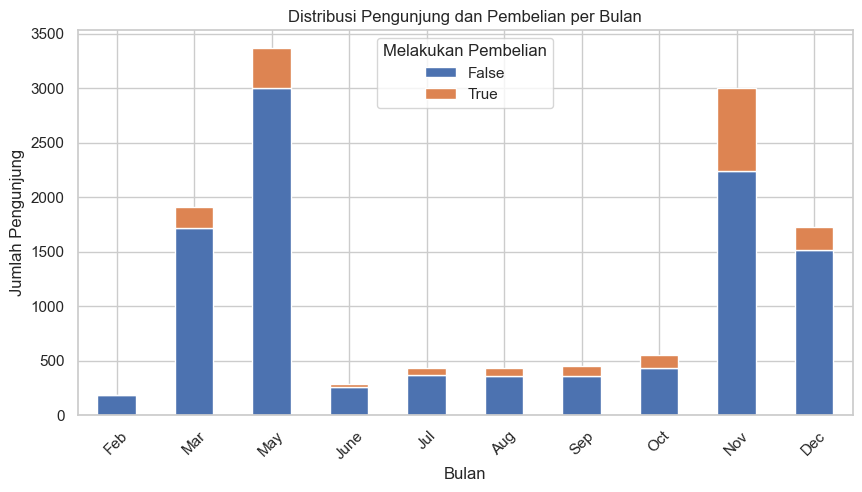

In [9]:
# Ubah nilai di kolom month supaya berurutan
month_order = ['Feb', 'Mar', 'May', 'June',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


df_raw['month'] = pd.Categorical(df_raw['month'], categories=month_order, ordered=True)

df_raw_sorted = df_raw.sort_values('month')

# Grouping berdasarkan bulan dan target pembelian
monthly_revenue = df_raw.groupby(['month', 'revenue']).size().unstack().fillna(0)

# Visualisasi
monthly_revenue.plot(kind='bar', stacked=True, figsize=(10, 5))
plt.title('Distribusi Pengunjung dan Pembelian per Bulan')
plt.ylabel('Jumlah Pengunjung')
plt.xlabel('Bulan')
plt.xticks(rotation=45)
plt.legend(title='Melakukan Pembelian')
plt.show()

>  **Insight:**
Bulan-bulan tertentu seperti November dan Mei memiliki tingkat pembelian yang lebih tinggi dibandingkan bulan lain. Hal ini dapat menunjukkan pola musiman (seasonal behavior) yang dapat menjadi insight bisnis maupun fitur tambahan pada model.

## **3. Analisis Pengunjung Berdasarkan Jenis Visitor**

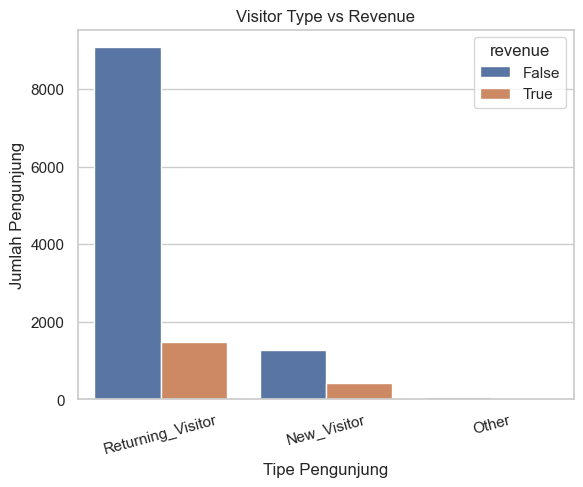

In [10]:
# Perbandingan proporsi visitor type terhadap revenue
sns.countplot(data=df_raw, x='visitor_type', hue='revenue')
plt.title('Visitor Type vs Revenue')
plt.ylabel('Jumlah Pengunjung')
plt.xlabel('Tipe Pengunjung')
plt.xticks(rotation=15)
plt.show()

> **Insight:**
Mayoritas pembelian berasal dari **Returning Visitors**, yang berarti pengunjung yang pernah datang sebelumnya lebih mungkin untuk membeli. Ini menjadi sinyal penting untuk strategi remarketing.

## **4. Analisa Rata-rata Durasi Pengunjung yang Membeli dan yang Tidak Membeli**

In [11]:
# Rata-rata durasi pengunjung yang membeli vs tidak
duration_cols = ['administrative__duration', 'informational__duration', 'product_related__duration']

df_raw.groupby('revenue')[duration_cols].mean()

,administrative__duration,informational__duration,product_related__duration
revenue,,,
False,73.740111,30.236237,1069.987809
True,119.483244,57.611427,1876.209615


> **Insight:**
Pengunjung yang melakukan pembelian menghabiskan waktu yang lebih lama pada halaman produk (`product_related_duration`). Ini menunjukkan bahwa durasi kunjungan bisa menjadi indikator kuat dari niat pembelian.

## **5. Korelasi Fitur Numerikal Terhadap Target (`revenue`)**

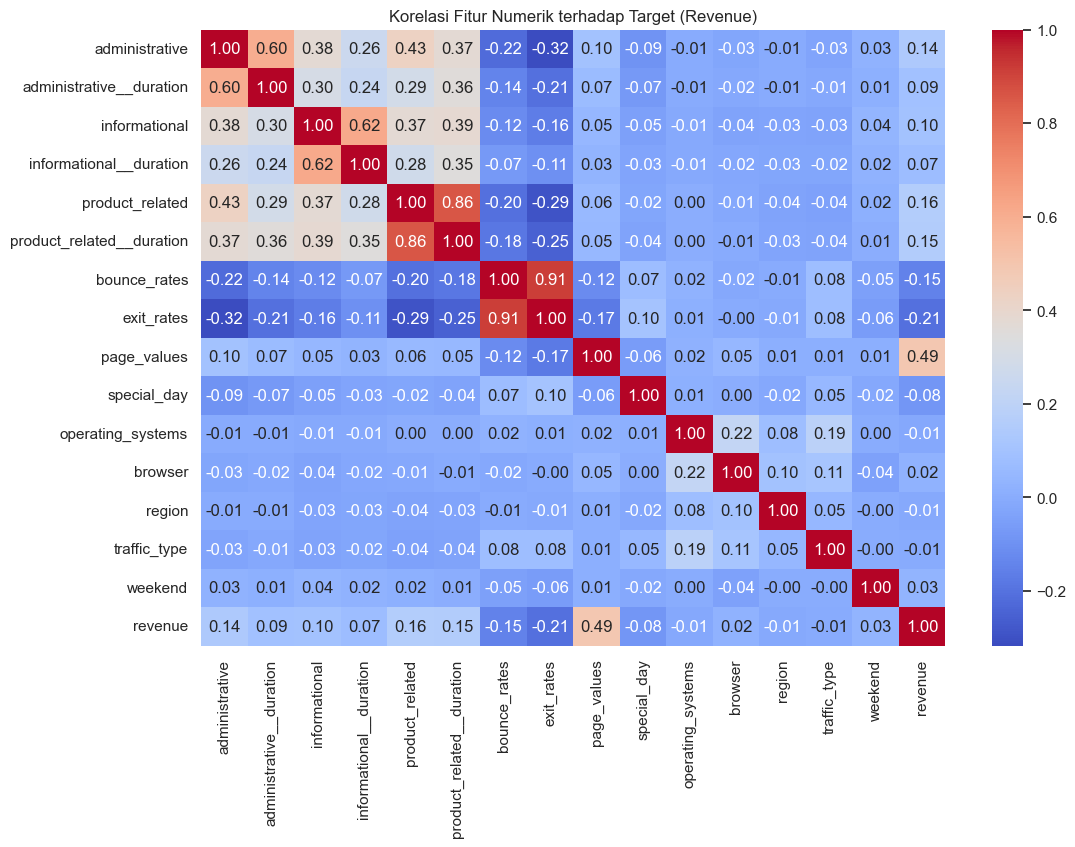

In [12]:
# Korelasi antar fitur numerikal terhadap target ('revenue')

plt.figure(figsize=(12, 8))
sns.heatmap(df_raw.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi Fitur Numerik terhadap Target (Revenue)')
plt.show()

> **Insight:**

Fitur yang paling berkorelasi positif dengan `revenue` adalah:
- `product_related_duration`
- `product_related`
- `page_values`

Sedangkan `bounce_rates` dan `exit_rates` menunjukkan korelasi negatif. Artinya, jika pengunjung cepat keluar atau bouncing, kemungkinan mereka membeli sangat kecil.

---

# **V. FEATURE ENGINEERING**

In [13]:
# Melihat semua kolom dan tipe datanya
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   administrative             12330 non-null  int64   
 1   administrative__duration   12330 non-null  float64 
 2   informational              12330 non-null  int64   
 3   informational__duration    12330 non-null  float64 
 4   product_related            12330 non-null  int64   
 5   product_related__duration  12330 non-null  float64 
 6   bounce_rates               12330 non-null  float64 
 7   exit_rates                 12330 non-null  float64 
 8   page_values                12330 non-null  float64 
 9   special_day                12330 non-null  float64 
 10  month                      12330 non-null  category
 11  operating_systems          12330 non-null  int64   
 12  browser                    12330 non-null  int64   
 13  region                     1233

> **Insight:**
Kolom `month`, `visitor_type`, `region`, `browser`, `operating_systems`, dan `traffic_type` adalah kategorikal. 
Kolom `revenue` adalah target. Tidak ada kolom ID unik yang bisa didrop. Semua kolom relevan untuk prediksi.

## **Ubah Tipe Data Kolom `revenue` dari Boolean ke Integer**

In [14]:
# ubah tipe data di kolom 'revenue' dari boolean ke integer
df_raw['revenue'] = df_raw['revenue'].astype(int)

df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   administrative             12330 non-null  int64   
 1   administrative__duration   12330 non-null  float64 
 2   informational              12330 non-null  int64   
 3   informational__duration    12330 non-null  float64 
 4   product_related            12330 non-null  int64   
 5   product_related__duration  12330 non-null  float64 
 6   bounce_rates               12330 non-null  float64 
 7   exit_rates                 12330 non-null  float64 
 8   page_values                12330 non-null  float64 
 9   special_day                12330 non-null  float64 
 10  month                      12330 non-null  category
 11  operating_systems          12330 non-null  int64   
 12  browser                    12330 non-null  int64   
 13  region                     1233

> Tipe data di kolom `revenue` sudah berubah menjadi integer

## **Cek Duplikasi & Missing Value**

In [15]:
# Mengecek apakah ada duplikasi baris dalam dataset
df_raw.duplicated().sum()

np.int64(125)

In [16]:
# Cek missing values
missing_values = df_raw.isna().sum().sort_values(ascending=False)

# Tampilkan kolom dengan missing_values values saja
missing_values[missing_values > 0]

Series([], dtype: int64)

In [17]:
# mengetahui berapa persen missing values
missing_percentage = df_raw.isnull().mean() * 100

# Menampilkan hanya kolom yang memiliki missing values
missing_percentage = missing_percentage[missing_percentage > 0]

# Urutkan dari yang paling tinggi
missing_percentage = missing_percentage.sort_values(ascending=False)

# Tampilkan
print(missing_percentage)

Series([], dtype: float64)


> Dataset tidak mengandung duplikat dan missing value. Cek missing values penting untuk dilakukan karena nilai yang hilang dapat menyebabkan error saat training model, mengurangi akurasi, dan mengganggu hasil analisis

## **Cek Kardinalitas**

In [18]:
# copy dataset raw ke df terlebih dahulu
df = df_raw.copy()

In [19]:
# function cek kardinalitas
def cardinality_check(df, list_cols):
  # code untuk cek nilai unique
  raw_unique = []

  for col in list_col:
    row = [col, df[col].nunique(), df[col].unique()]

    raw_unique.append(row)

  result = pd.DataFrame(raw_unique, columns=['Nama kolom', 'jumlah nilai unique', 'nilai unique'])

  # show df
  return result

In [20]:
# setting display
pd.set_option('max_colwidth', None)

# list kolom yang akan dicek
list_col = df.columns

# check
cardinality_check(df, list_col)

,Nama kolom,jumlah nilai unique,nilai unique
0,administrative,27,"[0, 1, 2, 4, 12, 3, 10, 6, 5, 9, 8, 16, 13, 11, 7, 18, 14, 17, 19, 15, 24, 22, 21, 20, 23, 27, 26]"
1,administrative__duration,3335,"[0.0, 53.0, 64.6, 6.0, 18.0, 9.0, 56.0, 16.0, 279.4166667, 87.83333333, 44.0, 1005.666667, 36.0, 18.33333333, 61.0, 31.0, 58.5, 326.25, 22.0, 462.0, 20.0, 111.5, 103.625, 19.0, 58.0, 9.5, 41.3, 87.0, 293.7782051, 47.0, 1226.0, 52.0, 112.9607843, 94.0, 32.0, 218.0, 119.0, 281.0, 40.0, 107.0, 49.0, 57.0, 2.0, 123.0, 118.0, 38.0, 54.0, 993.0, 74.25, 666.8333333, 73.0, 154.0, 49.33333333, 118.5, 153.5, 72.25, 24.5, 155.6313131, 21.33333333, 191.0, 96.5, 13.0, 1388.75, 51.0, 158.0, 10.0, 28.0, 27.0, 15.0, 1249.809524, 390.0, 215.5238095, 11.0, 8.0, 171.25, 227.3333333, 86.0, 7.0, 186.9761905, 138.0, 374.0, 14.0, 96.0, 615.25, 111.0, 147.0, 53.16666667, 48.5, 21.0, 115.3333333, 32.28571429, 277.75, 241.1666667, 64.0, 25.5, 130.0, 79.0, 84.0, 41.0, 618.0, ...]"
2,informational,17,"[0, 1, 2, 4, 16, 5, 3, 14, 6, 12, 7, 9, 10, 8, 11, 24, 13]"
3,informational__duration,1258,"[0.0, 120.0, 16.0, 94.0, 93.0, 75.0, 19.0, 22.0, 1210.397619, 153.0, 48.5, 51.0, 3.0, 144.0, 125.0, 127.0, 261.0, 306.3333333, 84.0, 740.0, 303.25, 21.5, 1220.0, 235.0, 100.0, 64.0, 47.0, 205.0, 70.0, 14.33333333, 24.0, 40.0, 136.0, 116.0, 929.0, 18.0, 155.5, 9.0, 1165.166667, 60.0, 528.0, 28.0, 654.3333333, 246.0, 142.0, 18.5, 39.0, 629.0, 267.5, 4.0, 132.0, 57.0, 14.0, 148.5, 954.0, 762.5, 449.3333333, 71.0, 212.5, 1411.0, 447.0, 28.5, 90.0, 245.0, 15.0, 125.0952381, 103.0, 404.0, 147.8666667, 263.0, 41.0, 53.0, 126.0, 371.0, 77.0, 395.0, 54.0, 40.66666667, 399.3333333, 345.0, 23.0, 29.5, 75.25, 122.0, 844.0, 407.0, 60.5, 81.0, 329.5, 162.0, 298.0, 357.0, 235.55, 30.0, 104.0, 17.0, 88.0, 321.6666667, 26.0, 336.5, ...]"
4,product_related,311,"[1, 2, 10, 19, 0, 3, 16, 7, 6, 23, 13, 20, 8, 5, 32, 4, 45, 14, 52, 9, 46, 15, 22, 11, 12, 36, 42, 27, 90, 18, 38, 17, 128, 25, 30, 21, 51, 26, 28, 31, 24, 50, 96, 49, 68, 98, 67, 55, 35, 37, 29, 34, 71, 63, 87, 40, 33, 54, 64, 75, 39, 111, 81, 61, 47, 44, 88, 149, 41, 79, 66, 43, 258, 80, 62, 83, 173, 48, 58, 57, 56, 69, 82, 59, 109, 287, 53, 84, 78, 137, 113, 89, 65, 60, 104, 129, 77, 74, 93, 76, ...]"
5,product_related__duration,9551,"[0.0, 64.0, 2.666666667, 627.5, 154.2166667, 37.0, 738.0, 395.0, 407.75, 280.5, 98.0, 68.0, 1668.285119, 334.9666667, 32.0, 2981.166667, 136.1666667, 105.0, 15.0, 156.0, 1135.444444, 76.0, 63.0, 1582.75, 35.0, 78.0, 209.5, 183.6666667, 380.5, 2086.242857, 388.0, 298.0, 482.0, 4084.393939, 22.0, 310.1666667, 34.0, 88.0, 622.25, 222.4, 80.0, 800.8333333, 265.1666667, 29.0, 160.0, 135.6666667, 998.7416667, 104.0, 381.6865079, 169.0, 400.8, 1553.583333, 706.5, 798.3333333, 6951.972222, 902.0, 197.3777778, 43.0, 426.6666667, 135.0, 588.3333333, 2111.341667, 208.0, 270.0, 39.5, 375.0, 150.0, 138.0, 337.5, 620.0333333, 168.8461538, 52.0, 649.25, 925.3333333, 33.0, 1566.5, 50.0, 644.2, 2635.177778, 607.0, 415.0, 2083.530952, 281.6666667, 27.0, 215.0, 162.0, 114.0, 5062.213753, 253.0, 436.5, 1045.833333, 317.8333333, 1146.333333, 577.0, 95.0, 301.5, 243.0, 135.5, 442.3333333, 41.0, ...]"
6,bounce_rates,1872,"[0.2, 0.0, 0.05, 0.02, 0.015789474, 0.01875, 0.008333333, 0.002857143, 0.043478261, 0.04, 0.014285714, 0.015384615, 0.025, 0.028571429, 0.003030303, 0.017142857, 0.066666667, 0.011111111, 0.011764706, 0.009, 0.002150538, 0.004347826, 0.016666667, 0.057142857, 0.003703704, 0.038095238, 0.004166667, 0.007058824, 0.15, 0.044444444, 0.000854701, 0.008, 0.012903226, 0.018181818, 0.028, 0.133333333, 0.005555556, 0.007142857, 0.0075, 0.1, 0.033333333, 0.008695652, 0.03030303, 0.015217391, 0.086666667, 0.010743802, 0.003174603, 0.001960784, 0.036190476, 0.009090909, 0.002061856, 0.013068182, 0.037619048, 0.006666667, 0.005714286, 0.08, 0.001481481, 0.010526316, 0.004, 0.005263158, 0.006896552, 0.011578947, 0.022807018, 0.023529412, 0.005, 0.012676056, 0.007246377, 0.01, 0.015555556, 0.006451613, 0.035714286, 0.0

> **Insight:** Berdasarkan hasil analisis kardinalitas, dataset menunjukkan kombinasi fitur dengan variasi rendah hingga sangat tinggi. Fitur-fitur seperti `administrative`, `informational`, dan `special_day` memiliki jumlah nilai unik yang relatif rendah, sehingga cocok diperlakukan sebagai fitur kategorikal atau ordinal tergantung konteks. Sebaliknya, fitur durasi seperti `administrative__duration`, `informational__duration`, dan terutama `product_related__duration` memiliki ribuan nilai unik, mencerminkan sifat kontinu dan variasi tinggi, yang berpotensi mengandung outlier dan memerlukan normalisasi atau transformasi. Beberapa fitur seperti `month`, `operating_systems`, dan `browser` memiliki jumlah kategori yang sedang dan bisa diolah dengan one-hot atau ordinal encoding. Sementara itu, fitur seperti `page_values`, `bounce_rates`, dan `exit_rates` memiliki distribusi nilai yang sangat granular dan memerlukan pengecekan distribusi untuk deteksi skewness atau outlier. Selain itu, fitur target `revenue` bersifat biner, cocok untuk model klasifikasi. Insight ini penting dalam menentukan strategi preprocessing, seperti pemilihan metode encoding, scaling, dan penanganan outlier untuk meningkatkan performa model machine learning.

## **Split Data**

In [21]:
# Menentukan x (fitur) dan y (target) pada dataset
# X adalah semua kolom kecuali 'revenue' (target)
# y adalah kolom 'revenue'
X = df.drop(columns=['revenue'])    # Buang kolom harga, sisakan fitur
y = df['revenue']

# Membagi data menjadi train set dan test set
# 80% data untuk training, 20% untuk testing, random_state untuk hasil konsisten
X_train, X_test, y_train, y_test = train_test_split(
    X,             # fitur
    y,             # target
    test_size=0.2, # ukuran test set
    random_state=42
)

num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Menampilkan ukuran hasil split data
print("Ukuran X_train:", X_train.shape)
print("Ukuran X_test :", X_test.shape)

num_cols, cat_cols

Ukuran X_train: (9864, 17)
Ukuran X_test : (2466, 17)


(['administrative',
  'administrative__duration',
  'informational',
  'informational__duration',
  'product_related',
  'product_related__duration',
  'bounce_rates',
  'exit_rates',
  'page_values',
  'special_day',
  'operating_systems',
  'browser',
  'region',
  'traffic_type'],
 ['month', 'visitor_type'])

> **Insight:**
Data telah dibagi menjadi training set dan testing set dengan stratifikasi terhadap target untuk menjaga proporsi `revenue` di kedua subset.

## **Cek & Handle Outliers**

In [22]:
# Function to create histogram and boxplot.
# This functions takes a dataframe (df) and the variable of interest as arguments.

def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

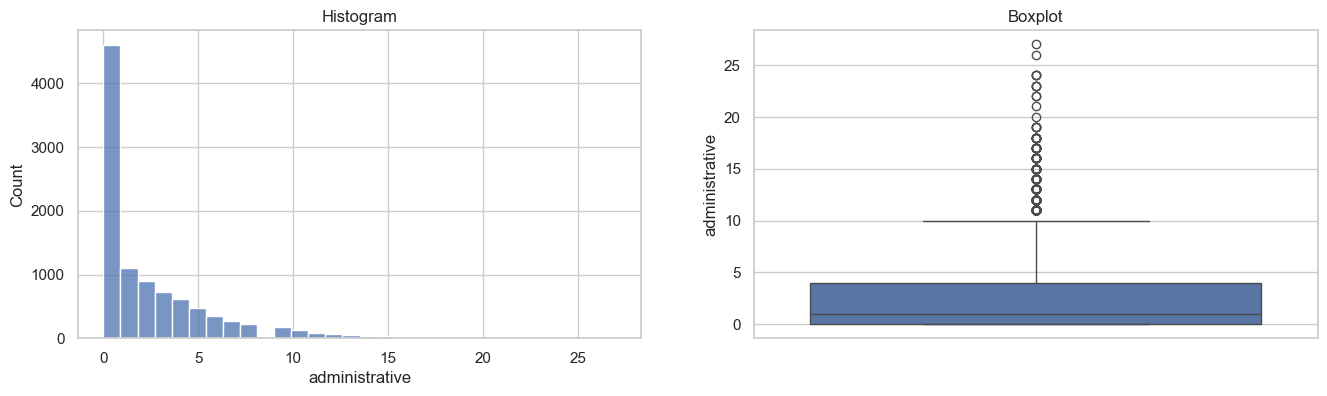

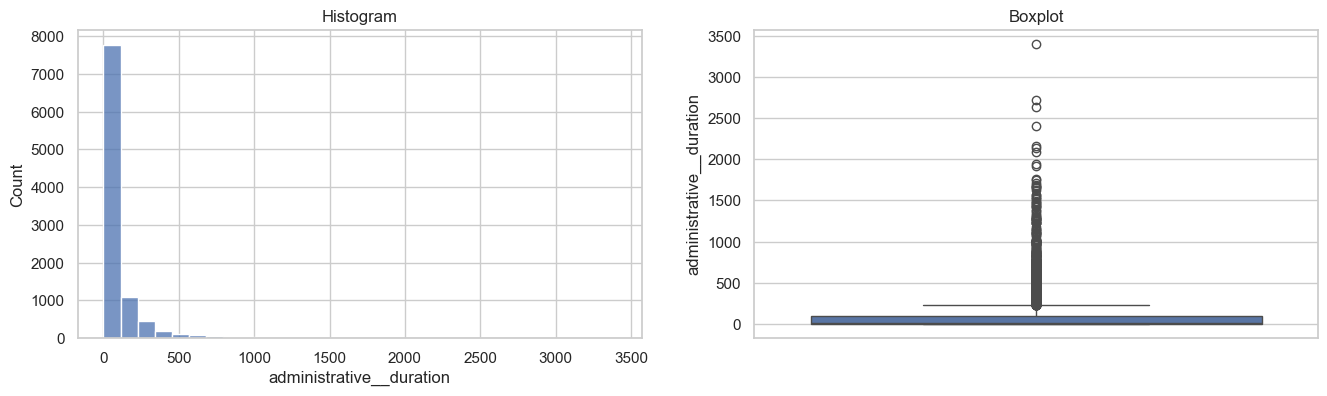

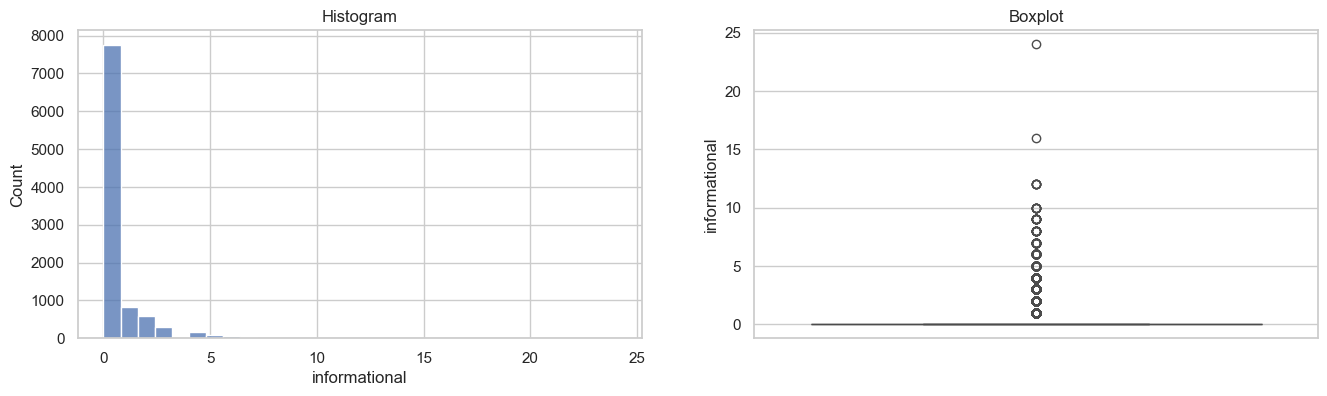

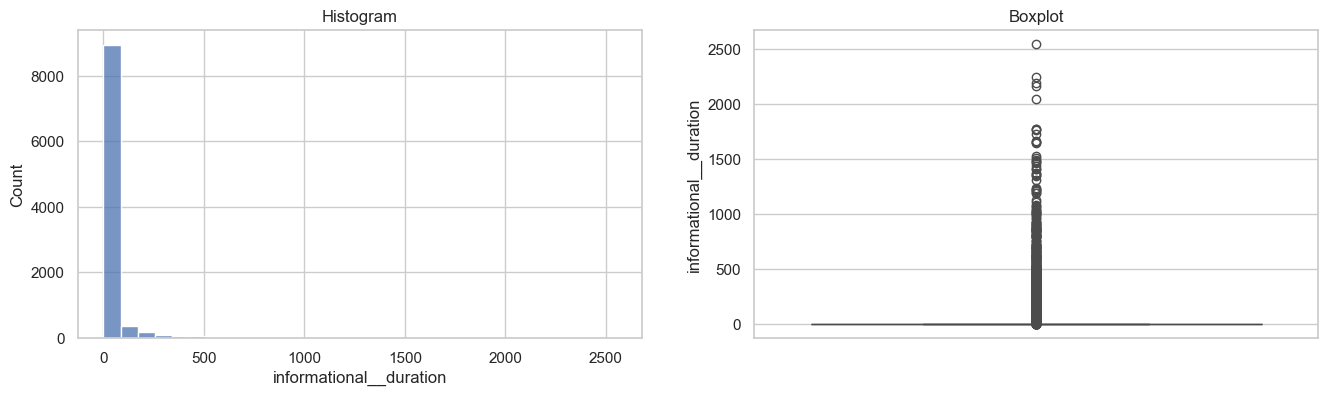

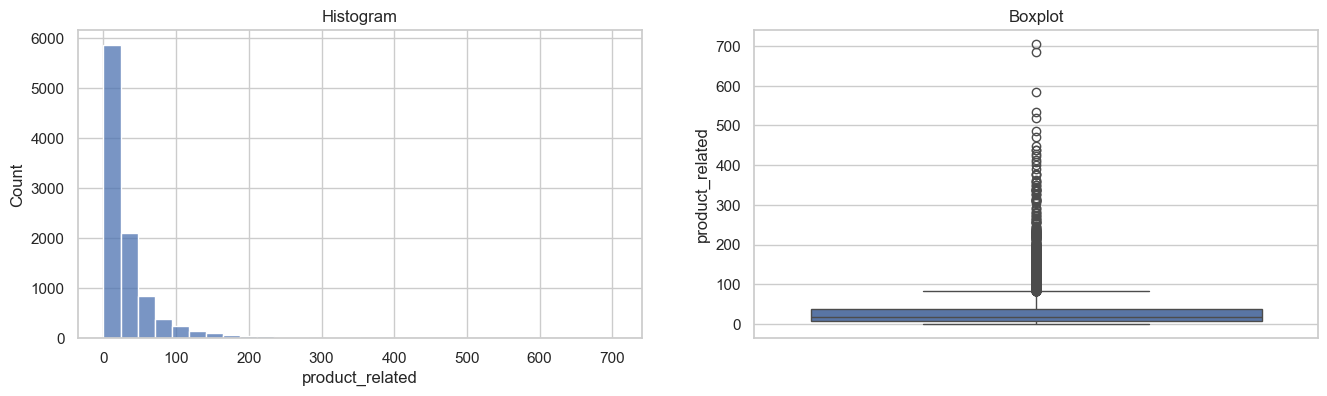

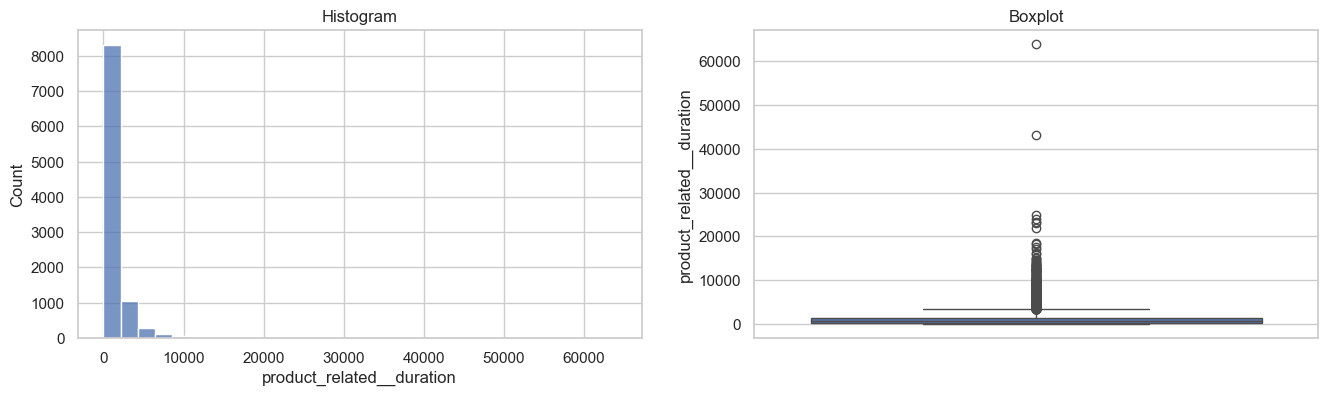

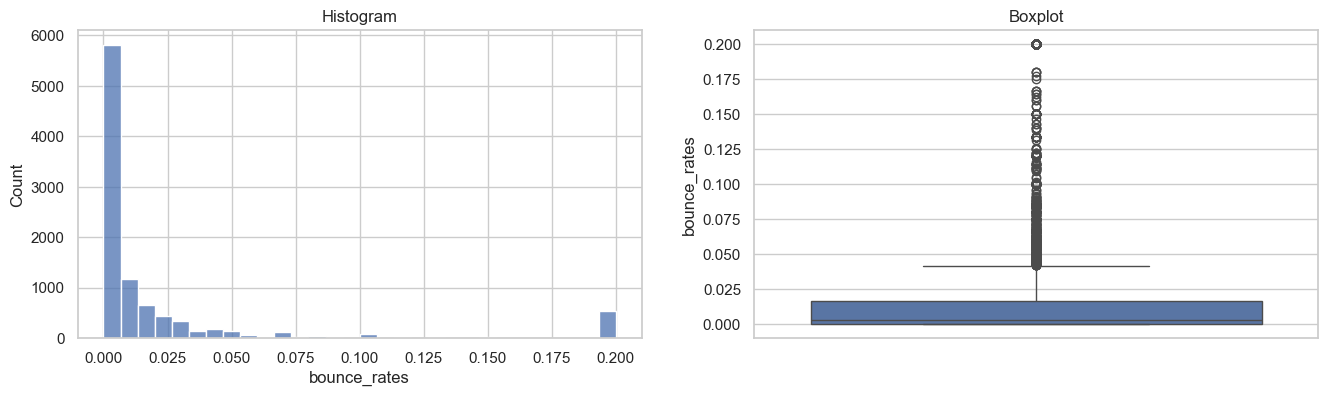

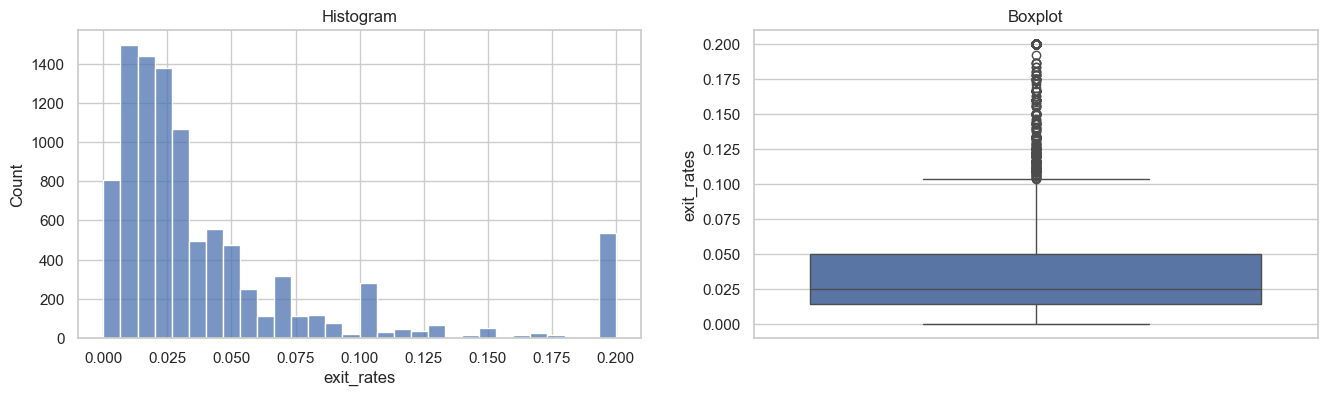

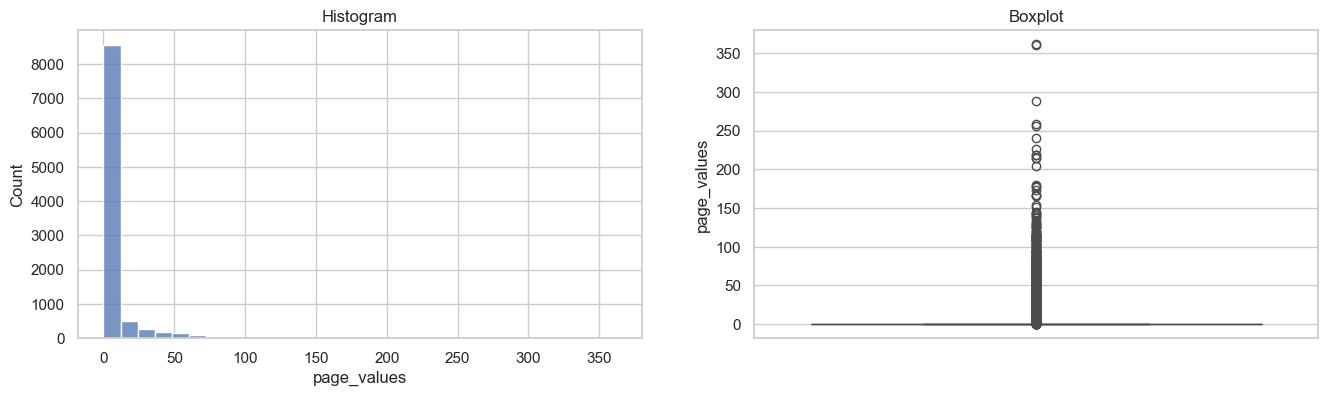

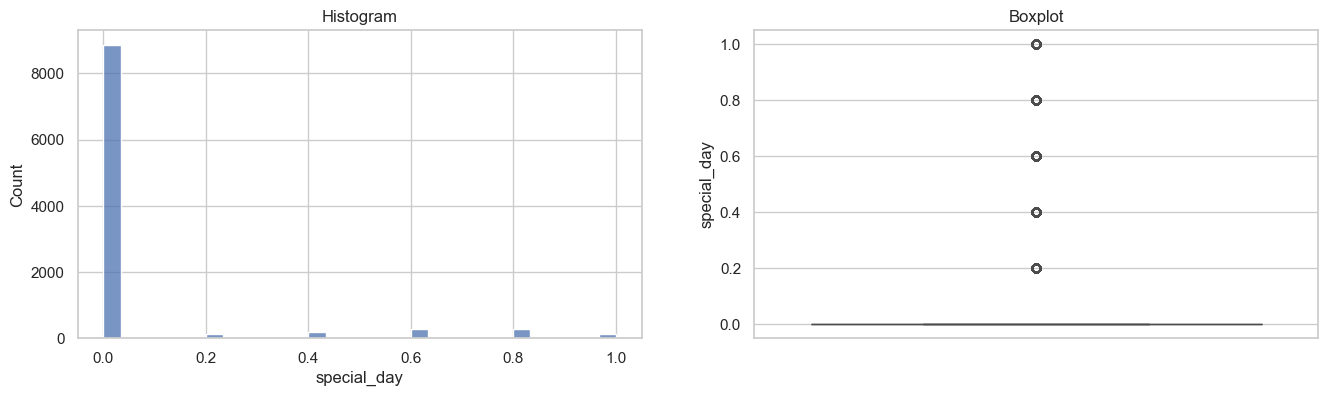

In [23]:
# checking distribution and upper, lower boundaries
list_cols = ['administrative', 'administrative__duration', 'informational', 'informational__duration', 'product_related', 
             'product_related__duration', 'bounce_rates', 'exit_rates', 'page_values', 'special_day'
             ]

# check
for col in list_cols:
    diagnostic_plots(X_train, col)

In [24]:
def outliers_checker(X_train:pd.DataFrame, list_cols:list):
  '''
  docstring
  '''

  # variable kosong
  result = []

  for col in list_cols:
    row = []

    # add nama kolom
    row.append(col)

    # check normalitas
    if np.abs(X_train[col].skew()) > 1 :
      row.append('Extreme Skew')
    elif np.abs(X_train[col].skew()) > 0.5:
      row.append('Skew')
    else:
      row.append('Normal')

    # upper dan lower boundaries
    if row[1] == 'normal':
      upper = X_train[col].mean() + 3 * X_train[col].std()
      lower = X_train[col].mean() - 3 * X_train[col].std()
    elif row[1] == 'skew':
      iqr = X_train[col].quantile(0.75) - X_train[col].quantile(0.25)
      upper = X_train[col].quantile(0.75) + 1.5 * iqr
      lower = X_train[col].quantile(0.25) - 1.5 * iqr
    else:
      iqr = X_train[col].quantile(0.75) - X_train[col].quantile(0.25)
      upper = X_train[col].quantile(0.75) + 3 * iqr
      lower = X_train[col].quantile(0.25) - 3 * iqr

    # add upper and lower boundaries
    row.append(round(upper, 2))
    row.append(round(lower, 2))

    # check outliers exists or not
    if len(X_train.loc[(X_train[col]<lower) | (X_train[col]>upper)]) > 0:
      row.append('Has Outliers')
      row.append(round(len(X_train.loc[(X_train[col]<lower) | (X_train[col]>upper)]) / len(X_train) * 100,2))
    else:
      row.append('No Outliers')
      row.append(0.0)


    result.append(row)

  result = pd.DataFrame(result, columns=['Nama Kolom', 'Skewness', 'Upper Boundary',
                                         'Lower Boundary', 'Outliers Status', 'Outliers Pct (in %)'])
  return result

In [25]:
# checking distribution and upper, lower boundaries
list_cols = ['administrative', 'administrative__duration', 'informational', 'informational__duration', 'product_related', 
             'product_related__duration', 'bounce_rates', 'exit_rates', 'page_values', 'special_day'
             ]

# check
outliers_checker(X_train, list_cols)

,Nama Kolom,Skewness,Upper Boundary,Lower Boundary,Outliers Status,Outliers Pct (in %)
0,administrative,Extreme Skew,16.00,-12.00,Has Outliers,0.42
1,administrative__duration,Extreme Skew,368.00,-276.00,Has Outliers,4.65
2,informational,Extreme Skew,0.00,0.00,Has Outliers,21.40
3,informational__duration,Extreme Skew,0.00,0.00,Has Outliers,19.54
4,product_related,Extreme Skew,127.00,-83.00,Has Outliers,3.71
5,product_related__duration,Extreme Skew,5326.76,-3669.57,Has Outliers,3.29
6,bounce_rates,Extreme Skew,0.07,-0.05,Has Outliers,8.28
7,exit_rates,Extreme Skew,0.16,-0.09,Has Outliers,6.02
8,page_values,Extreme Skew,0.00,0.00,Has Outliers,21.92
9,special_day,Extreme Skew,0.00,0.00,Has Outliers,10.08


> Semua data memiliki outliers, maka selanjutkan akan dilakukkan capping menggunakan IQR untuk menghilangkan outliers

In [26]:
# handle outliers dengan winsorizer (extreme)
list_extreme = ['administrative', 'administrative__duration',
                'product_related', 'product_related__duration', 'bounce_rates', 'exit_rates'
                ]

winsoriser_fare = Winsorizer(capping_method='iqr',
                             tail='both',
                             fold=3,
                             variables=list_extreme,
                             missing_values='ignore')

X_train_capped = winsoriser_fare.fit_transform(X_train)
X_test_capped = winsoriser_fare.transform(X_test)

In [27]:
outliers_checker(X_train_capped, list_cols)

,Nama Kolom,Skewness,Upper Boundary,Lower Boundary,Outliers Status,Outliers Pct (in %)
0,administrative,Extreme Skew,16.00,-12.00,No Outliers,0.00
1,administrative__duration,Extreme Skew,368.00,-276.00,No Outliers,0.00
2,informational,Extreme Skew,0.00,0.00,Has Outliers,21.40
3,informational__duration,Extreme Skew,0.00,0.00,Has Outliers,19.54
4,product_related,Extreme Skew,127.00,-83.00,No Outliers,0.00
5,product_related__duration,Extreme Skew,5326.76,-3669.57,No Outliers,0.00
6,bounce_rates,Extreme Skew,0.07,-0.05,No Outliers,0.00
7,exit_rates,Extreme Skew,0.16,-0.09,No Outliers,0.00
8,page_values,Extreme Skew,0.00,0.00,Has Outliers,21.92
9,special_day,Extreme Skew,0.00,0.00,Has Outliers,10.08


>  **Insight:**
Outlier telah dicapping menggunakan metode Winsorizer agar tidak terlalu mendistorsi model. Untuk kolom yang masih ada Outliers tidak bisa dihandle dengan cara apapun karena datanya sangat skew.

## **Feature Selection**

Feature selection perlu dilakukan untuk mengurangi noise, meningkatkan performa model, dan mempercepat waktu komputasi dengan hanya mempertahankan fitur yang benar-benar relevan terhadap target.

In [28]:
# drop kolom yang tidak diperlukan
dropped_cols = ['browser', 'region', 'traffic_type', 'operating_systems']
X_train_capped = X_train_capped.drop(dropped_cols, axis=1)

# Tampilkan hasilnya
print(X_train_capped)

       administrative  administrative__duration  informational  \
1785                0                      0.00              0   
10407               2                     14.00              0   
286                 0                      0.00              0   
6520                5                     49.20              4   
12251               0                      0.00              1   
...               ...                       ...            ...   
11964              14                    368.00              0   
5191                0                      0.00              0   
5390                0                      0.00              0   
860                 0                      0.00              0   
7270                7                    138.15              0   

       informational__duration  product_related  product_related__duration  \
1785                       0.0                7                  95.000000   
10407                      0.0               81    

> Berdasarkan analisis kardinalitas dan pertimbangan relevansi terhadap predictive modeling, berikut adalah beberapa kolom yang sebaiknya dipertimbangkan untuk di-drop karena alasan seperti redundansi informasi, terlalu banyak nilai unik (high cardinality) tanpa makna prediktif yang kuat, atau tidak informatif.

>1. `browser` (13 unique values)

- Seringkali tidak terlalu relevan untuk memprediksi revenue, kecuali dataset berasal dari sektor teknologi atau berbasis analisis perangkat.

>2. `region` (9 unique values)

- Kecuali ada informasi bahwa wilayah geografis memengaruhi konversi (revenue), kolom ini cenderung tidak terlalu informatif.

>3. `traffic_type` (20 unique values)

- Meski bisa memiliki makna, jumlah kategorinya cukup banyak dan biasanya bersifat nominal tanpa makna ordinal. Kolom ini bisa membingungkan dan justru memperburuk model.

>4. `operating_systems` (8 unique values)

- Mirip browser, bisa menjadi noise jika tidak ada pengaruh yang jelas ke konversi.

In [29]:
# define list cols
num_dis_cols = ['administrative', 'informational', 'product_related']

# uji statistika
result = []

# Use X_train_capped and y_train
for col in num_dis_cols:
    row = []
    # Ensure both arrays have the same length
    corr, p_value = stats.spearmanr(X_train_capped[col], y_train)

    # add column
    row.append(col)

    # add corr
    row.append(corr)

    # add p_value
    if p_value < 0.05:
        row.append('Statistically Significant')
    else:
        row.append('Not Significant')

    result.append(row)

result = pd.DataFrame(result, columns=['Nama Kolom', 'Correlation', 'Status'])

result

,Nama Kolom,Correlation,Status
0,administrative,0.161097,Statistically Significant
1,informational,0.114682,Statistically Significant
2,product_related,0.191690,Statistically Significant


**Numerical Continuous**

In [30]:
# define list cols
num_con_cols = ['administrative__duration', 'informational__duration', 'product_related__duration',
             'bounce_rates', 'exit_rates', 'page_values',
             'special_day']


# uji statistika
result = []

for col in num_con_cols:
  row = []
  corr, p_value = pearsonr(X_train_capped[col], y_train)

  # add column
  row.append(col)

  # add corr
  row.append(corr)

  # add p_value
  if p_value < 0.05:
    row.append('Statistically Significant')
  else:
    row.append('Not significant')

  result.append(row)


result = pd.DataFrame(result, columns=['Nama Kolom', 'Correlation', 'Status'])

result

,Nama Kolom,Correlation,Status
0,administrative__duration,0.123399,Statistically Significant
1,informational__duration,0.065073,Statistically Significant
2,product_related__duration,0.177456,Statistically Significant
3,bounce_rates,-0.176328,Statistically Significant
4,exit_rates,-0.218783,Statistically Significant
5,page_values,0.495700,Statistically Significant
6,special_day,-0.090200,Statistically Significant


**Categorical Nominal**

In [31]:
# define list
nom_cat_cals = ['visitor_type']

# visitor_type
returning_visitor = y_train.loc[X_train_capped[X_train_capped['visitor_type'].str.strip() =='Returning_Visitor'].index]
new_visitor  =y_train.loc[X_train_capped[X_train_capped['visitor_type'].str.strip() =='New_Visitor'].index]
other =y_train.loc[X_train_capped[X_train_capped['visitor_type'].str.strip() =='Other'].index]

res = stats.f_oneway(returning_visitor, new_visitor, other)
print('P-value:',[ 'Significantly Related' if res.pvalue < 0.05 else 'Not Significant'])

P-value: ['Significantly Related']


**Categorical Ordinal**

In [32]:
# Kendall mapping
month_map = X_train_capped['month'].map({
    'Feb': 1, 'Mar': 2, 'May': 3, 'June': 4,
    'Jul': 5, 'Aug': 6, 'Sep': 7, 'Oct': 8,
    'Nov': 9, 'Dec': 10
})

corr_tau, pval_k = stats.kendalltau(month_map, y_train)
print('P-value:', ['Significantly Related' if pval_k < 0.05 else 'Not Significant'])

P-value: ['Significantly Related']


## **Scaling & Encoding**

In [33]:
# divide columns

num_cols = ['administrative', 'administrative__duration', 'informational', 'informational__duration',
                'product_related', 'product_related__duration',
                'bounce_rates', 'exit_rates', 'page_values']
nom_cat_cols = ['visitor_type']
ord_cat_cols = ['month']
passthrough = ['special_day']

# pipeline data numerical
num_cols = Pipeline([
    ('scaler', StandardScaler())
])

# pipeline data kategorikal nominal
pipe_cat_nom = Pipeline([
    ('One Hot Encoder', OneHotEncoder(handle_unknown='ignore'))
])

# pipeline data kategorikal ordinal
pipe_cat_ord = Pipeline([
    ('Ordinal encoder', OrdinalEncoder(categories=[['Feb', 'Mar', 'May', 'June', 'Jul',
                                                    'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]))

])

# column transformer
preprocessor = ColumnTransformer([
    ('Num', num_cols, num_dis_cols),
    ('Cat Nominal', pipe_cat_nom, nom_cat_cols),
    ('Cat Ordinal', pipe_cat_ord, ord_cat_cols),
    ('Teruskan', 'passthrough', passthrough)
])

preprocessor

,transformers,"[('Num', ...), ('Cat Nominal', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,copy,True
,with_mean,True
,with_std,True


> Fungsi di atas menyusun sebuah data preprocessing pipeline menggunakan Pipeline dan ColumnTransformer dari Scikit-Learn untuk mempersiapkan data sebelum dimasukkan ke dalam model machine learning.

> **Insight:**
Seluruh proses preprocessing, mulai dari spliting data, handling outliers, encoding kategorikal, hingga scaling telah disatukan dalam pipeline akhir yang siap digunakan untuk pelatihan model.

---

# **VI. MODEL DEFINITION**

Pada bagian ini, akan didefinisikan lima model supervised classification yang akan digunakan:

1. **K-Nearest Neighbors (KNN)**  
   Model ini berbasis instance-based learning yang sederhana dan efektif, terutama untuk data yang tidak terlalu besar. KNN mempertimbangkan kedekatan antar data untuk menentukan kelas.

2. **Support Vector Machine (SVM)**  
   Cocok untuk klasifikasi biner dan bekerja baik di ruang dimensi tinggi. Dengan kernel, model ini dapat menangani data non-linear.

3. **Decision Tree**  
   Mudah dipahami dan diinterpretasikan, serta cepat untuk dilatih. Namun rentan terhadap overfitting.

4. **Random Forest**  
   Merupakan ensemble dari banyak decision tree, sehingga lebih stabil dan memiliki akurasi lebih tinggi dibanding single tree.

5. **Gradient Boosting (Boosting)**  
   Algoritma ensemble berbasis boosting yang sangat akurat karena setiap pohon baru fokus memperbaiki kesalahan dari model sebelumnya.

**Metrik Evaluasi**

Karena kelas target `revenue` tidak seimbang (mayoritas pengunjung tidak membeli), maka akurasi saja tidak cukup. Oleh karena itu, kita akan menggunakan metriks:
- **F1 Score**: kombinasi dari precision dan recall
- **Cross-validation** untuk hasil yang lebih generalizable

Hyperparameter tuning akan dilakukan pada model terbaik yang telah dilatih.

In [34]:
# KNN Classifier
model_knn = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=7))
])

model_knn

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('Num', ...), ('Cat Nominal', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [35]:
# SVM Classifier
model_svm = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(random_state=42, probability=True))
])

model_svm

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('Num', ...), ('Cat Nominal', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [36]:
# Decision Tree Classifier
model_dtc = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

model_dtc

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('Num', ...), ('Cat Nominal', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [37]:
# Random Forest Classifier
model_rfc = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

model_rfc

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('Num', ...), ('Cat Nominal', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [38]:
model_gboost = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

model_gboost

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('Num', ...), ('Cat Nominal', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


---

# **VII. MODEL TRAINING**

In [39]:
# Training model KNN
model_knn.fit(X_train_capped, y_train)

f1_train_cross_val = cross_val_score(model_knn,
                                     X_train_capped,
                                     y_train,
                                     cv=3,
                                     scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.17664671 0.15238095 0.15611193]
F1 Score - Mean - Cross Validation :  0.16171319609186144
F1 Score - Std - Cross Validation  :  0.010668875260451089
F1 Score - Range of Test-Set       :  0.15104432083141034 - 0.17238207135231254


In [40]:
# training model SVM
model_svm.fit(X_train_capped, y_train)

f1_train_cross_val = cross_val_score(model_svm,
                                     X_train_capped,
                                     y_train,
                                     cv=3,
                                     scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0. 0. 0.]
F1 Score - Mean - Cross Validation :  0.0
F1 Score - Std - Cross Validation  :  0.0
F1 Score - Range of Test-Set       :  0.0 - 0.0


In [41]:
# training model decision tree classifier
model_dtc.fit(X_train_capped, y_train)

f1_train_cross_val = cross_val_score(model_dtc,
                                     X_train_capped,
                                        y_train,
                                        cv=3,
                                        scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))


F1 Score - All - Cross Validation  :  [0.25420168 0.2326087  0.20917823]
F1 Score - Mean - Cross Validation :  0.23199620157097223
F1 Score - Std - Cross Validation  :  0.018385849189660734
F1 Score - Range of Test-Set       :  0.21361035238131149 - 0.25038205076063297


In [42]:
# Training model Random Forest Classifier
model_rfc.fit(X_train_capped, y_train)
f1_train_cross_val = cross_val_score(model_rfc,
                                     X_train_capped,
                                     y_train,
                                     cv=3,
                                     scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.19371728 0.20078227 0.18961039]
F1 Score - Mean - Cross Validation :  0.1947033118920598
F1 Score - Std - Cross Validation  :  0.0046138861283264755
F1 Score - Range of Test-Set       :  0.19008942576373333 - 0.19931719802038628


In [43]:
# Training model gradient boosting classifier
model_gboost.fit(X_train_capped, y_train)
f1_train_cross_val = cross_val_score(model_gboost,
                                     X_train_capped,
                                     y_train,
                                     cv=3,
                                     scoring="f1")

print('F1 Score - All - Cross Validation  : ', f1_train_cross_val)
print('F1 Score - Mean - Cross Validation : ', f1_train_cross_val.mean())
print('F1 Score - Std - Cross Validation  : ', f1_train_cross_val.std())
print('F1 Score - Range of Test-Set       : ', (f1_train_cross_val.mean()-f1_train_cross_val.std()) , '-', (f1_train_cross_val.mean()+f1_train_cross_val.std()))

F1 Score - All - Cross Validation  :  [0.07985481 0.02745098 0.06417112]
F1 Score - Mean - Cross Validation :  0.05715897094139862
F1 Score - Std - Cross Validation  :  0.02196084442766077
F1 Score - Range of Test-Set       :  0.035198126513737854 - 0.07911981536905939


**Penjelasan**



---

# **VIII. MODEL EVALUATION**

In [44]:
y_train_pred_knn = model_knn.predict(X_train_capped)
y_test_pred_knn = model_knn.predict(X_test_capped)

y_train_pred_svm = model_svm.predict(X_train_capped)
y_test_pred_svm = model_svm.predict(X_test_capped)

y_train_pred_dtc = model_dtc.predict(X_train_capped)
y_test_pred_dtc = model_dtc.predict(X_test_capped)

y_train_pred_rfc = model_rfc.predict(X_train_capped)
y_test_pred_rfc = model_rfc.predict(X_test_capped)

y_train_pred_gboost = model_gboost.predict(X_train_capped)
y_test_pred_gboost = model_gboost.predict(X_test_capped)


> Fungsi prediksi ini digunakan untuk mengukur performa masing-masing model pada data training dan test, sehingga kita dapat mengevaluasi apakah model mengalami overfitting atau underfitting. Dengan membandingkan hasil prediksi ini menggunakan metrik seperti F1 Score dan classification report, kita dapat menilai konsistensi model dan memilih model yang paling stabil serta generalizable untuk data baru. Langkah ini sangat penting dalam proses evaluasi akhir sebelum model dipilih untuk tuning atau deployment.

In [45]:
# Evaluasi model KNN
print("KNN Classifier - Training Set")
print("F1 Score:", f1_score(y_train, y_train_pred_knn))
print("Classification Report:\n", classification_report(y_train, y_train_pred_knn))

KNN Classifier - Training Set
F1 Score: 0.27714581178903824
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92      8367
           1       0.61      0.18      0.28      1497

    accuracy                           0.86      9864
   macro avg       0.74      0.58      0.60      9864
weighted avg       0.83      0.86      0.82      9864



In [46]:
# Evaluasi model SVM
print("SVM Classifier - Training Set")
print("F1 Score:", f1_score(y_train, y_train_pred_svm))
print("Classification Report:\n", classification_report(y_train, y_train_pred_svm))


SVM Classifier - Training Set
F1 Score: 0.0
Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      8367
           1       0.00      0.00      0.00      1497

    accuracy                           0.85      9864
   macro avg       0.42      0.50      0.46      9864
weighted avg       0.72      0.85      0.78      9864



In [47]:
# Evaluasi model Decision Tree Classifier
print("Decision Tree Classifier - Training Set")
print("F1 Score:", f1_score(y_train, y_train_pred_dtc))
print("Classification Report:\n", classification_report(y_train, y_train_pred_dtc))

Decision Tree Classifier - Training Set
F1 Score: 0.7871581450653984
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      8367
           1       0.97      0.66      0.79      1497

    accuracy                           0.95      9864
   macro avg       0.96      0.83      0.88      9864
weighted avg       0.95      0.95      0.94      9864



In [48]:
# Evaluasi model Random Forest Classifier
print("Random Forest Classifier - Training Set")
print("F1 Score:", f1_score(y_train, y_train_pred_rfc))
print("Classification Report:\n", classification_report(y_train, y_train_pred_rfc))

Random Forest Classifier - Training Set
F1 Score: 0.794174013031813
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      8367
           1       0.93      0.69      0.79      1497

    accuracy                           0.95      9864
   macro avg       0.94      0.84      0.88      9864
weighted avg       0.94      0.95      0.94      9864



In [49]:
# Evaluasi model Gradient Boosting Classifier
print("Gradient Boosting Classifier - Training Set")
print("F1 Score:", f1_score(y_train, y_train_pred_gboost))
print("Classification Report:\n", classification_report(y_train, y_train_pred_gboost))

Gradient Boosting Classifier - Training Set
F1 Score: 0.10757946210268948
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92      8367
           1       0.63      0.06      0.11      1497

    accuracy                           0.85      9864
   macro avg       0.74      0.53      0.51      9864
weighted avg       0.82      0.85      0.80      9864



In [50]:
# dataframe comparation
compare_data = pd.DataFrame()
compare_data['Asli'] = y_train
compare_data['prediksi KNN'] = y_train_pred_knn
compare_data['prediksi SVM'] = y_train_pred_svm
compare_data['prediksi DTC'] = y_train_pred_dtc
compare_data['prediksi RFC'] = y_train_pred_rfc
compare_data['prediksi GBoost'] = y_train_pred_gboost

compare_data.head(10)


,Asli,prediksi KNN,prediksi SVM,prediksi DTC,prediksi RFC,prediksi GBoost
1785,0,0,0,0,0,0
10407,0,0,0,0,0,0
286,0,0,0,0,0,0
6520,0,0,0,0,0,0
12251,0,0,0,0,0,0
1758,0,0,0,0,0,0
5524,1,0,0,1,1,0
1284,0,0,0,0,0,0
5350,0,0,0,0,0,0
5284,0,0,0,0,0,0


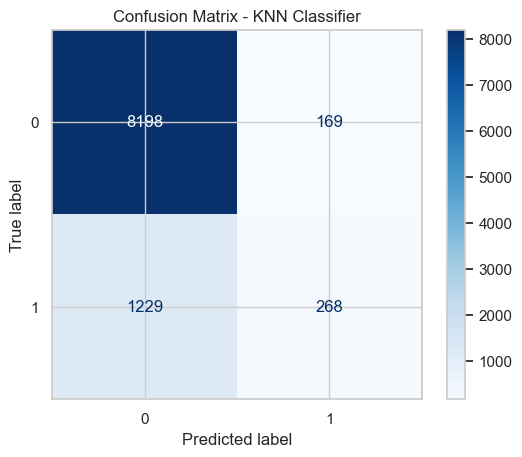

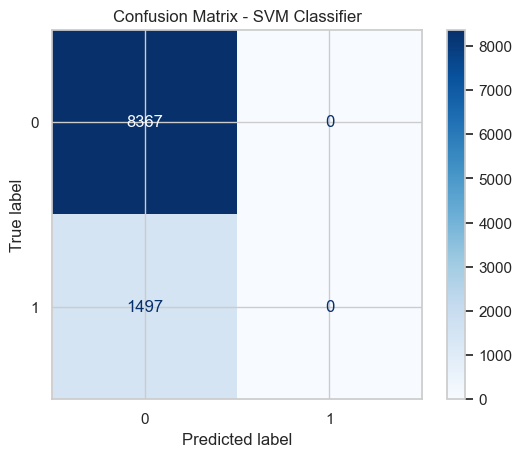

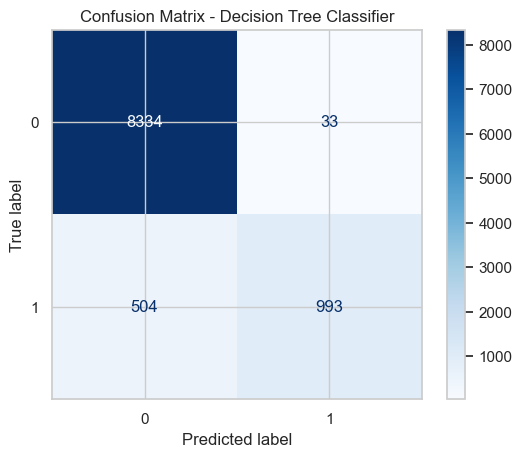

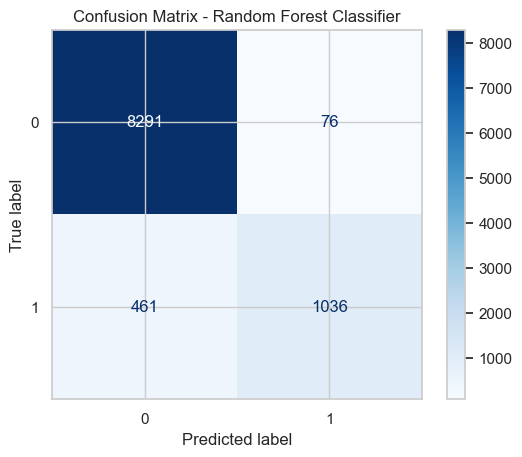

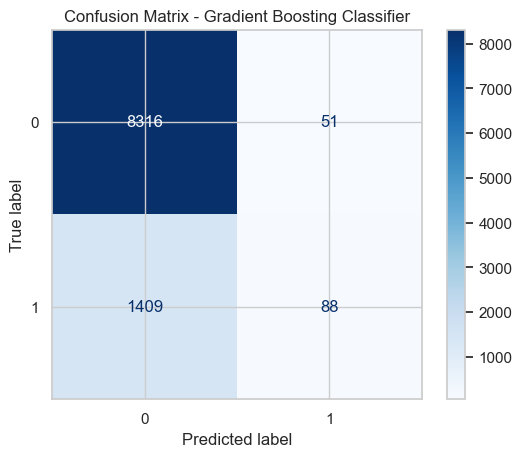

In [51]:
# visualisasi confusion matrix
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

# Plot confusion matrix untuk KNN
plot_confusion_matrix(y_train, y_train_pred_knn, title='Confusion Matrix - KNN Classifier')

# Plot confusion matrix untuk SVM
plot_confusion_matrix(y_train, y_train_pred_svm, title='Confusion Matrix - SVM Classifier')

# Plot confusion matrix untuk Decision Tree Classifier
plot_confusion_matrix(y_train, y_train_pred_dtc, title='Confusion Matrix - Decision Tree Classifier')

# Plot confusion matrix untuk Random Forest Classifier
plot_confusion_matrix(y_train, y_train_pred_rfc, title='Confusion Matrix - Random Forest Classifier')

# Plot confusion matrix untuk Gradient Boosting Classifier
plot_confusion_matrix(y_train, y_train_pred_gboost, title='Confusion Matrix - Gradient Boosting Classifier')

> **Insight:** Berdasarkan hasil evaluasi F1 Score melalui cross-validation, model **Decision Tree Classifier** menunjukkan performa terbaik dengan rata-rata F1 Score sebesar 0.2319, serta rentang test-set yang stabil dan cukup tinggi dibandingkan model lainnya. Meskipun Random Forest dan KNN juga menunjukkan performa yang cukup baik, nilai F1 Score-nya masih berada di bawah Decision Tree, sementara SVM dan Gradient Boosting memiliki performa sangat rendah dan tidak layak dipertimbangkan tanpa tuning lebih lanjut. Dengan mempertimbangkan akurasi prediksi terhadap kelas minoritas, konsistensi antar fold (std rendah), dan kemudahan interpretasi, Decision Tree dipilih sebagai model terbaik untuk baseline dan merupakan kandidat ideal untuk proses Hyperparameter Tuning dan deployment selanjutnya.

**Hyperparameter Tuning**

In [52]:
# Hyperparameter tuning untuk Decision Tree dengan Grid Search

# Tuning parameters
param_grid = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [None, 5, 10, 15],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# Pipeline ulang untuk tuning
model_dtc = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Grid Search
grid_search = GridSearchCV(estimator=model_dtc,
                            param_grid=param_grid,
                            scoring='f1',
                            cv=5,
                            n_jobs=-1,  # Gunakan semua core CPU
                            verbose=1)

# Fit
grid_search.fit(X_train_capped, y_train)

# Hasil
print("Best Params:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)



Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Params: {'classifier__criterion': 'gini', 'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}
Best F1 Score: 0.229995978348839


Hasil tuning terhadap model Decision Tree menunjukkan bahwa parameter terbaik yang ditemukan melalui GridSearchCV adalah:

- `criterion='gini'`,

- `max_depth=None`,

- `min_samples_split=2`,

- `min_samples_leaf=1`,

dengan `F1 Score` terbaik sebesar `0.2299`.

> **Insight**: Meskipun dilakukan eksplorasi terhadap 72 kombinasi hyperparameter, hasil tuning menunjukkan bahwa performa terbaik justru dicapai oleh parameter default (nilai-nilai awal bawaan dari DecisionTreeClassifier). Ini menunjukkan bahwa model Decision Tree pada dasarnya sudah cukup optimal di konfigurasi awal untuk dataset ini, dan tuning tidak memberikan peningkatan signifikan pada F1 Score. Hal ini bisa disebabkan oleh kompleksitas data yang tidak terlalu tinggi atau karena model cenderung overfit ketika struktur pohon dibatasi. Dengan demikian, keputusan untuk mempertahankan parameter default dapat dibenarkan, dan selanjutnya fokus dapat dialihkan ke pendekatan lain untuk peningkatan performa lebih lanjut.

In [53]:
# perbanding hasil model decision tree sebelum tuning dan sesudah tuning
# simpan hasil tuning
best_model = grid_search.best_estimator_

# Sebelum tuning
model_dtc.fit(X_train_capped, y_train)
y_train_pred_dtc = model_dtc.predict(X_train_capped)

# Setelah tuning
model_dtc_tuned = grid_search.best_estimator_
y_train_pred_dtc_tuned = model_dtc_tuned.predict(X_train_capped)

# Membandingkan hasil model sebelum dan sesudah tuning
compare_data['prediksi Decision Tree'] = y_train_pred_dtc
compare_data['prediksi Decision Tree Tuning'] = y_train_pred_dtc_tuned

compare_data.head(10)


,Asli,prediksi KNN,prediksi SVM,prediksi DTC,prediksi RFC,prediksi GBoost,prediksi Decision Tree,prediksi Decision Tree Tuning
1785,0,0,0,0,0,0,0,0
10407,0,0,0,0,0,0,0,0
286,0,0,0,0,0,0,0,0
6520,0,0,0,0,0,0,0,0
12251,0,0,0,0,0,0,0,0
1758,0,0,0,0,0,0,0,0
5524,1,0,0,1,1,0,1,1
1284,0,0,0,0,0,0,0,0
5350,0,0,0,0,0,0,0,0
5284,0,0,0,0,0,0,0,0


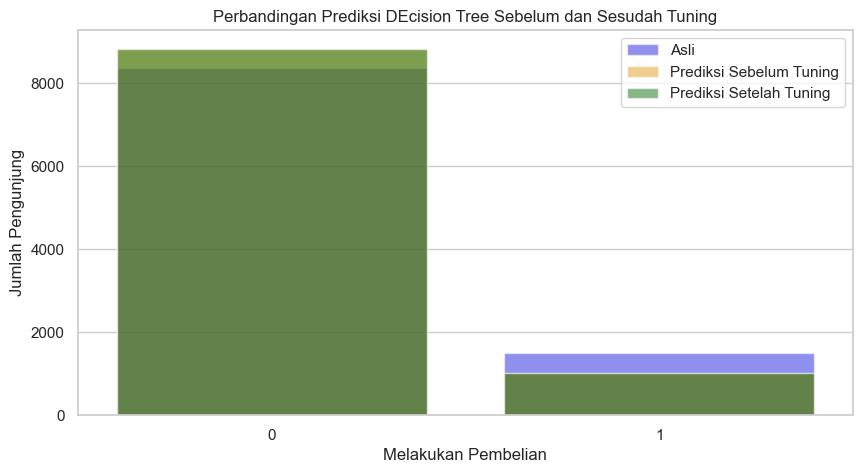

In [54]:
# perbandingan gradient boosting classifier sebelum dan sesudah tuning
def plot_comparison(y_true, y_pred_before, y_pred_after, title='Comparison of Predictions'):
    plt.figure(figsize=(10, 5))
    sns.countplot(x=y_true, label='Asli', color='blue', alpha=0.5)
    sns.countplot(x=y_pred_before, label='Prediksi Sebelum Tuning', color='orange', alpha=0.5)
    sns.countplot(x=y_pred_after, label='Prediksi Setelah Tuning', color='green', alpha=0.5)
    plt.title(title)
    plt.xlabel('Melakukan Pembelian')
    plt.ylabel('Jumlah Pengunjung')
    plt.legend()
    plt.show()

# Plot perbandingan prediksi sebelum dan sesudah tuning
plot_comparison(y_train, y_train_pred_dtc, y_train_pred_dtc_tuned,
                title='Perbandingan Prediksi DEcision Tree Sebelum dan Sesudah Tuning')


> Gambar tersebut menunjukkan perbandingan prediksi model Decision Tree sebelum dan sesudah dilakukan hyperparameter tuning terhadap data test, dibandingkan dengan data asli . Pada label 0 (tidak melakukan pembelian), ketiga bar (asli, sebelum tuning, dan sesudah tuning) memiliki tinggi yang hampir sama, menandakan bahwa model mampu mengenali mayoritas kelas dengan baik. Namun, pada label 1 (melakukan pembelian), terlihat bahwa prediksi sebelum tuning sedikit lebih tinggi dari hasil tuning, tetapi keduanya tetap jauh lebih rendah dibandingkan nilai asli. Ini menunjukkan bahwa meskipun tuning sedikit menurunkan jumlah prediksi positif, hal tersebut dapat berarti model menjadi lebih konservatif dan menghindari false positive.

---

# **IX. MODEL SAVING**

In [55]:
# Simpan model terbaik (Random Forest) ke dalam file pickle
with open('best_model_dtc.pkl', 'wb') as file:
    pickle.dump(best_model, file)

> Model terbaik yaitu **Decision Tree Classifier** telah disimpan dengan nama `best_model_dtc.pkl`. File ini mencakup seluruh pipeline: preprocessing, scaling, encoding, dan model prediktif, sehingga siap digunakan kembali saat inference maupun deployment tanpa perlu preprocessing ulang.

---

# **X. MODEL INFERENCE**


*Terpisah dari Notebook ini*

---

# **XI. CONCLUSION**

Dari sisi pengembangan model machine learning, proyek ini berhasil membangun pipeline klasifikasi berbasis algoritma supervised learning dengan tujuan memprediksi kemungkinan seorang pengunjung website jualbeli.co.id akan melakukan pembelian. Lima algoritma telah diuji, yaitu KNN, SVM, Decision Tree, Random Forest, dan Gradient Boosting melalui proses hyperparameter tuning serta evaluasi menggunakan metrik seperti F1 Score, didapatkan bahwa Decision Tree Classifier merupakan model dengan performa terbaik. Model ini menunjukkan hasil yang seimbang terlihat dari hasil F1 Score. Selain itu, pipeline telah mencakup seluruh preprocessing penting, termasuk handling outliers, scaling, dan encoding, sehingga menjadikan model siap untuk deployment dan inference langsung terhadap data mentah.

Dari sisi bisnis, model ini memberikan kemampuan prediktif yang kuat dalam mengidentifikasi calon pembeli potensial, yang merupakan nilai tambah strategis bagi tim pemasaran dan produk. Insight dari eksplorasi data menunjukkan bahwa Returning Visitors, pengunjung yang aktif di bulan-bulan tertentu (seperti November), serta mereka yang menghabiskan waktu lebih lama pada halaman produk, memiliki kemungkinan lebih tinggi untuk melakukan pembelian. Berdasarkan temuan ini, disarankan agar perusahaan melakukan remarketing atau retargeting terhadap pengguna yang sudah pernah mengunjungi situs dengan durasi tinggi, serta melakukan kampanye promosi atau diskon intensif menjelang bulan-bulan musiman. Selain itu, strategi UX dapat difokuskan untuk mempertahankan pengunjung di halaman produk lebih lama dengan konten yang engaging dan relevan untuk meningkatkan kemungkinan konversi pembelian.